In [81]:
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation 
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam 
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
from keras.applications.vgg16 import VGG16

In [69]:
train_path = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/two/train'
test_path = 'D:/MASTER/SEM2/AI/PROJECT/TL/COVID19_Detection_TL_Dataset_Update/two/test'

In [73]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['covid','normal'], batch_size=100)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['covid','normal'], batch_size=11)

Found 130 images belonging to 2 classes.
Found 11 images belonging to 2 classes.


In [77]:
def plots (ims,figsize=(24,12), rows=5, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] !=3):
            ims = ims.transpose((0,2,3,1))
        f = plt.figure(figsize=figsize)
        cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
        for i in range(len(ims)):
            sp = f.add_subplot(rows, cols, i+1)
            sp.axis('Off')
            if titles is not None:
                sp.set_title(titles[i], fontsize=16)
            plt.imshow(ims[1], interpolation=None if interp else 'None')

In [78]:
imgs, labels = next(train_batches)

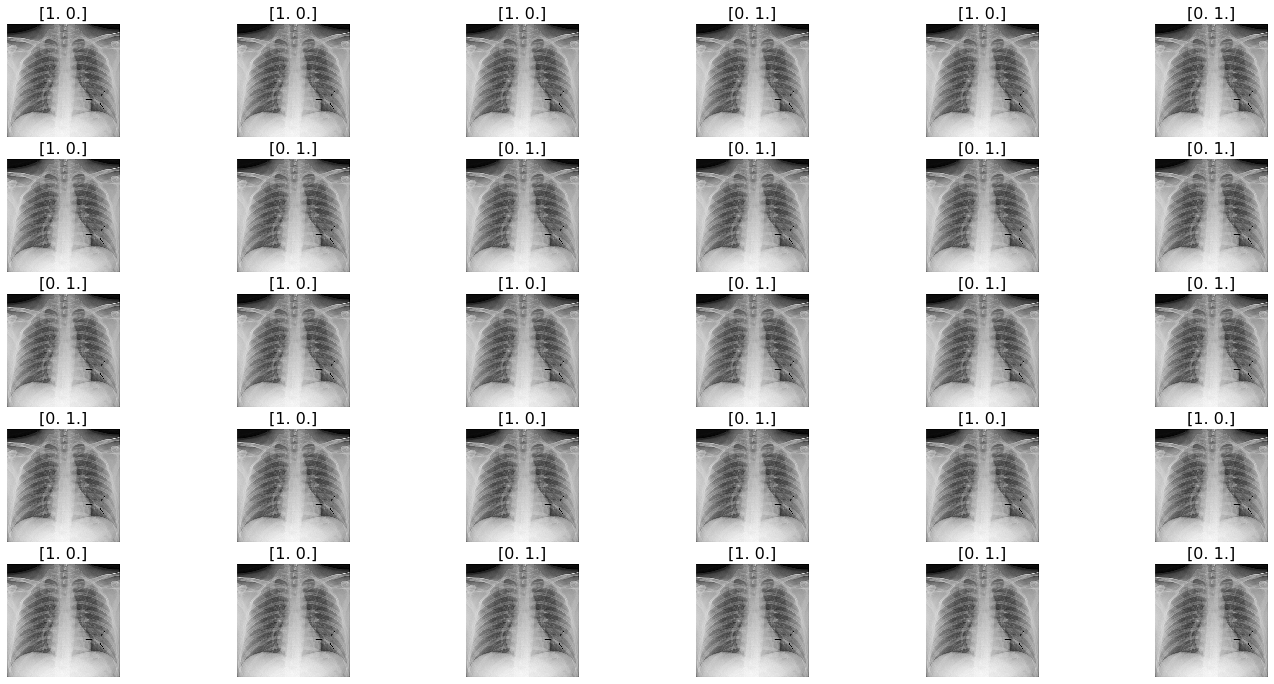

In [79]:
plots(imgs, titles=labels)

In [83]:
model = Sequential([
        VGG16(32, (3,3), input_shape=(224,224,3)),
        Flatten(),
        Dense(2, activation='softmax')
])

TypeError: stat: path should be string, bytes, os.PathLike or integer, not tuple

In [67]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_5 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
model.compile(Adam(lr=.0005), loss='categorical_crossentropy', metrics=['acc'])

In [59]:
model.fit_generator(train_batches, steps_per_epoch=5,
                   validation_data=valid_batches, validation_steps=4, epochs=5, verbose=2)

Epoch 1/5
 - 19s - loss: 9632.6863 - acc: 0.4520 - val_loss: 4257.0967 - val_acc: 0.6928
Epoch 2/5
 - 18s - loss: 4705.9224 - acc: 0.6460 - val_loss: 3492.0950 - val_acc: 0.4444
Epoch 3/5
 - 14s - loss: 1308.6299 - acc: 0.6981 - val_loss: 13586.2100 - val_acc: 0.3208
Epoch 4/5
 - 12s - loss: 558.8667 - acc: 0.8929 - val_loss: 1515.7666 - val_acc: 0.5817
Epoch 5/5
 - 15s - loss: 852.5016 - acc: 0.8040 - val_loss: 4723.5161 - val_acc: 0.3987


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


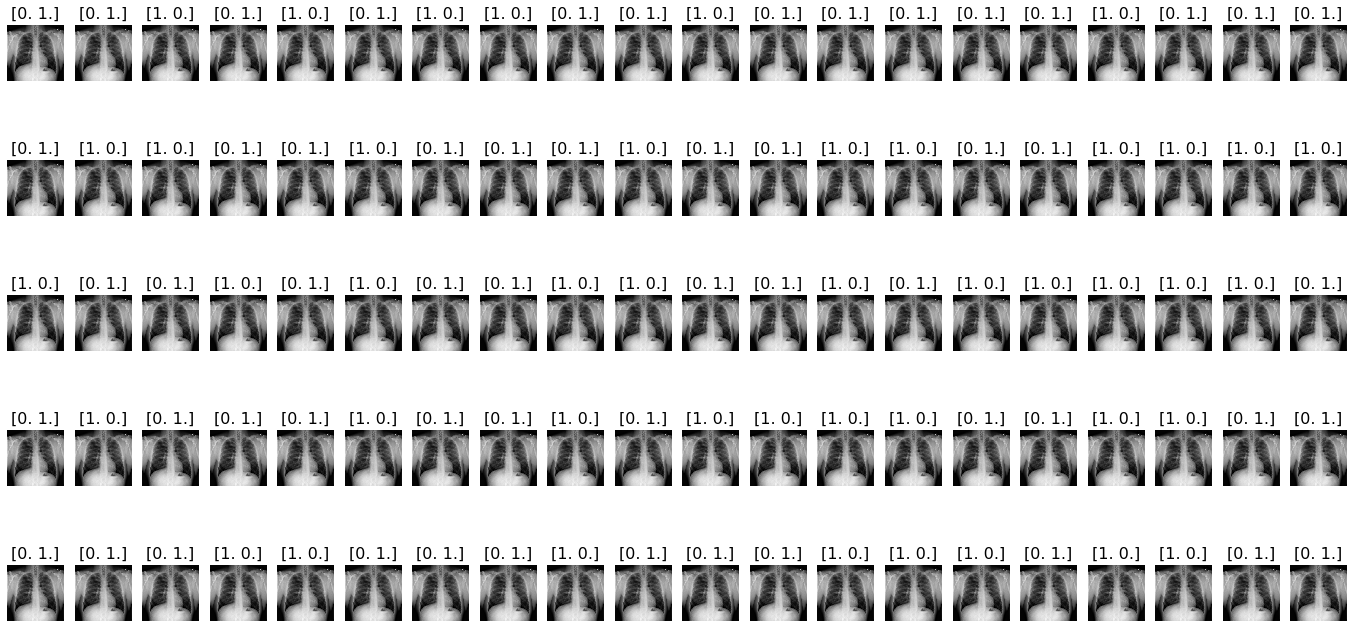

In [60]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [61]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 0.],
      dtype=float32)

In [62]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [63]:
predictions

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [64]:
cm = confusion_matrix(test_labels, predictions[:,0])

In [65]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confusion matrix',
                         cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print('Confusion Matrix, without normalization')
    
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[45 11]
 [ 0 44]]


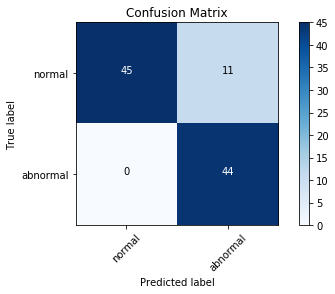

In [66]:
cm_plot_labels = ['normal','abnormal']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')